In [37]:
!pip install stemgraphic

In [38]:
'''
Esta celda carga las librerias necesarias para el analisis
'''
# imports
import numpy as np
import matplotlib.pyplot as plt


# Quiz 2024-11-08 GRUPO 8

- Sea $X_{n}=\{ \frac{40}{2(i+3)}: 0 < i \leq 10 \}$

    - Realizar el histgrama usando cualquier método diferente a los vistos en clase (Sturges, Rice, Ráiz Cuadrada).
    - Analizar la distribución
    - Realizar el diagrama de Tallos y Hojas

In [39]:
# Generar los datos
data_08 = np.round([(40/(2*(i+3))) for i in range(1,11)],2)
print(data_08)
print(np.sort(data_08))

[5.   4.   3.33 2.86 2.5  2.22 2.   1.82 1.67 1.54]
[1.54 1.67 1.82 2.   2.22 2.5  2.86 3.33 4.   5.  ]


## Métodos

## Regla de Scott

Sirve para calcular el ancho $(w)$ de la clase $(k)$ y se define:

$$w = 3.49 \times s \times n^{\frac{-1}{3}}$$



Este es el número de datos -- n = 10
Este es el promedio de los datos -- media = 2.694
Esta es la desviación estandar de los datos -- s = 1.1226674584320249
Este es el ancho de las clases -- w = 1.8186252978825654
Este es el número de las clases -- k = 2


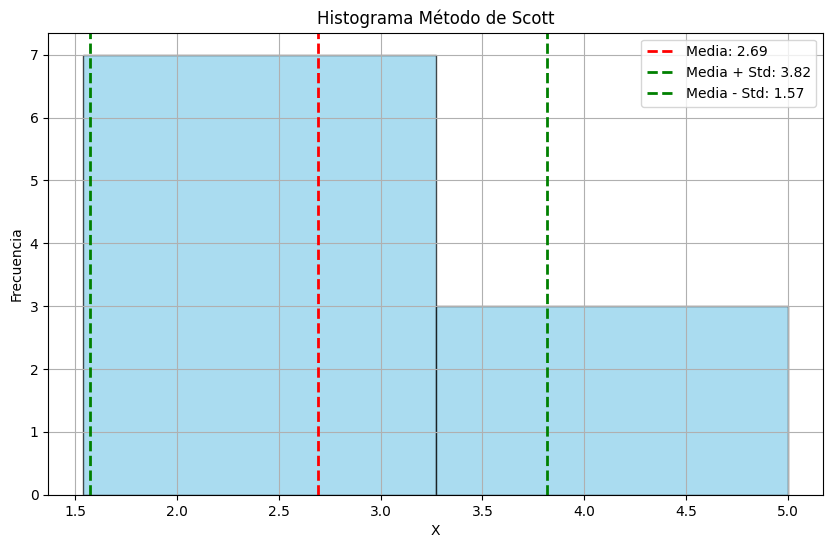

In [40]:
# Regla de scott

# Parámetros
n_08 = len(data_08)
print("Este es el número de datos -- n = {}".format(n_08))

mean_08 = np.sum(data_08)/n_08
print("Este es el promedio de los datos -- media = {}".format(mean_08))

std_08 = (np.sum((data_08 - mean_08)**2)/(n_08-1))**0.5
print("Esta es la desviación estandar de los datos -- s = {}".format(std_08))

w_08 = 3.49 * std_08 * n_08**(-1/3)
print("Este es el ancho de las clases -- w = {}".format(w_08))

k_08 = int(np.ceil((np.max(data_08) - np.min(data_08))/w_08))
print("Este es el número de las clases -- k = {}".format(k_08))


# Histograma método de Scott
plt.figure(figsize=(10, 6))
plt.hist(data_08, bins = k_08, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mean_08, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_08:.2f}')
plt.axvline(mean_08 + std_08, color='green', linestyle='--', linewidth=2, label=f'Media + Std: {mean_08 + std_08:.2f}')
plt.axvline(mean_08 - std_08, color='green', linestyle='--', linewidth=2, label=f'Media - Std: {mean_08 - std_08:.2f}')
plt.title('Histograma Método de Scott')
plt.xlabel('X')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)


## Freedman–Diaconis rule

Sirve para calcular el ancho $(w)$ de la clase $(k)$ y se define:

$$w = 2\times IQR \times n^{\frac{-1}{3}}$$



In [41]:
# Función para ilustrar los percentiles. No es óptima en datasets grandes
def perc_data(array,value):
    '''
    value: float (0,100)
    array: np.array
    return: np.array
    '''
    sorted_data = array
    n = len(array)
    empty_list = []
    value = value/100

    for i in range(n):
        # Esto cuenta los datos que son menores o iguales que x_i
        count_greater_equal = np.sum(np.greater_equal(sorted_data[i], sorted_data))

        # Esto cuenta los datos que son mayores o iguales que x_i
        count_less_equal = np.sum(np.less_equal(sorted_data[i], sorted_data))

        # La condición dice que la cantidad de datos menores o iguales a
        # x_i deber ser al menos n*p
        # La condicioón dice que la cantidad de datos que son mayores o iguales
        # que x_i deber ser al menos n*(1-p)

        if count_greater_equal >= n*value and count_less_equal >= n*(1-value):
            empty_list.append(sorted_data[i])
    return np.array(empty_list)



Este es el primer cuartil -- Q1 = 1.82
Este es el tercer cuartil -- Q3 = 3.33
Este es el rango intercuartil -- IQR = 1.51
Este es el ancho de las clases -- w = 1.4017598277510592
Este es el número de las clases -- k = 3


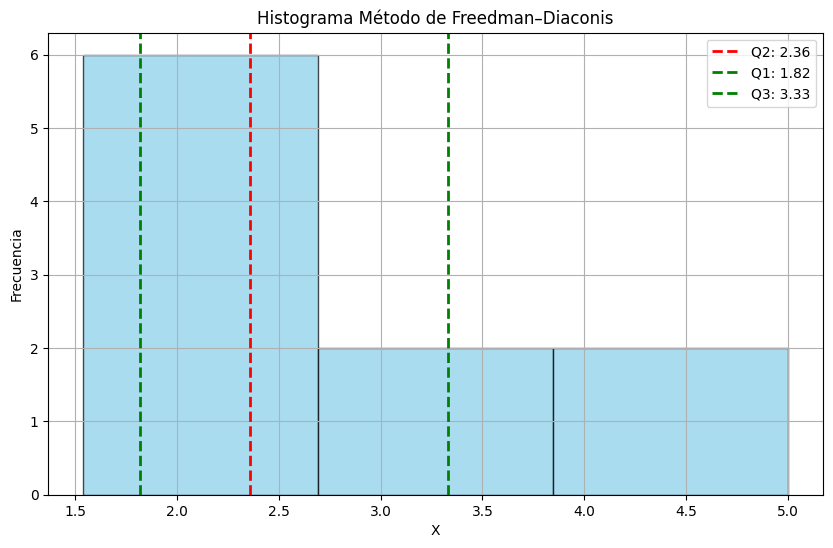

In [42]:
# Regla Freedman–Diaconis rule
Q1_08 = perc_data(array=data_08,value=25)[0] if len(perc_data(array=data_08,value=25)) == 0 else np.mean(perc_data(array=data_08,value=25))
Q2_08 = perc_data(array=data_08,value=50)[0] if len(perc_data(array=data_08,value=50)) == 0 else np.mean(perc_data(array=data_08,value=50))
Q3_08 = perc_data(array=data_08,value=75)[0] if len(perc_data(array=data_08,value=75)) == 0 else np.mean(perc_data(array=data_08,value=75))
IQR_08 = Q3_08 - Q1_08
w_08_f = 2*IQR_08*n_08**(-1/3)
k_08_f = int(np.ceil((np.max(data_08) - np.min(data_08))/w_08_f))
print("Este es el primer cuartil -- Q1 = {}".format(Q1_08))
print("Este es el tercer cuartil -- Q3 = {}".format(Q3_08))
print("Este es el rango intercuartil -- IQR = {}".format(IQR_08))
print("Este es el ancho de las clases -- w = {}".format(w_08_f))
print("Este es el número de las clases -- k = {}".format(k_08_f))

# Histograma método de Freedman–Diaconis
plt.figure(figsize=(10, 6))
plt.hist(data_08, bins = k_08_f, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(Q2_08, color='red', linestyle='--', linewidth=2, label=f'Q2: {Q2_08:.2f}')
plt.axvline(Q1_08, color='green', linestyle='--', linewidth=2, label=f'Q1: {Q1_08:.2f}')
plt.axvline(Q3_08, color='green', linestyle='--', linewidth=2, label=f'Q3: {Q3_08:.2f}')
plt.title('Histograma Método de Freedman–Diaconis')
plt.xlabel('X')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)

# Diagrama de tallos y hojas

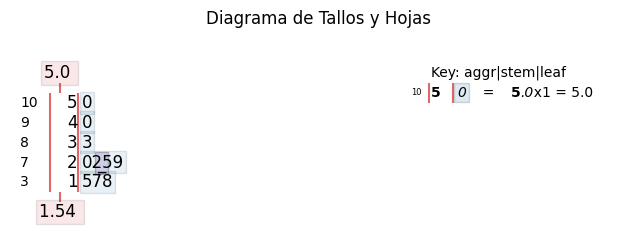

In [43]:
import stemgraphic

# Crear el diagrama de tallo y hojas
fig, ax = stemgraphic.stem_graphic(data_08, scale=1)
plt.title('Diagrama de Tallos y Hojas')
plt.show()